<a href="https://colab.research.google.com/github/simodepth/Data-Analysis-Models/blob/main/K_Means_Clustering_with_Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kmeans Clustering with Scikit-learn


---
**K-means** is a machine learning algorithm often employed in unsupervised learning for clustering problems.

Despite being time-consumed and biased especially on equal sized clusters, the k-means allows you to overcome unsupervised learning problems involving numeric non-modal data (numbers/integers)
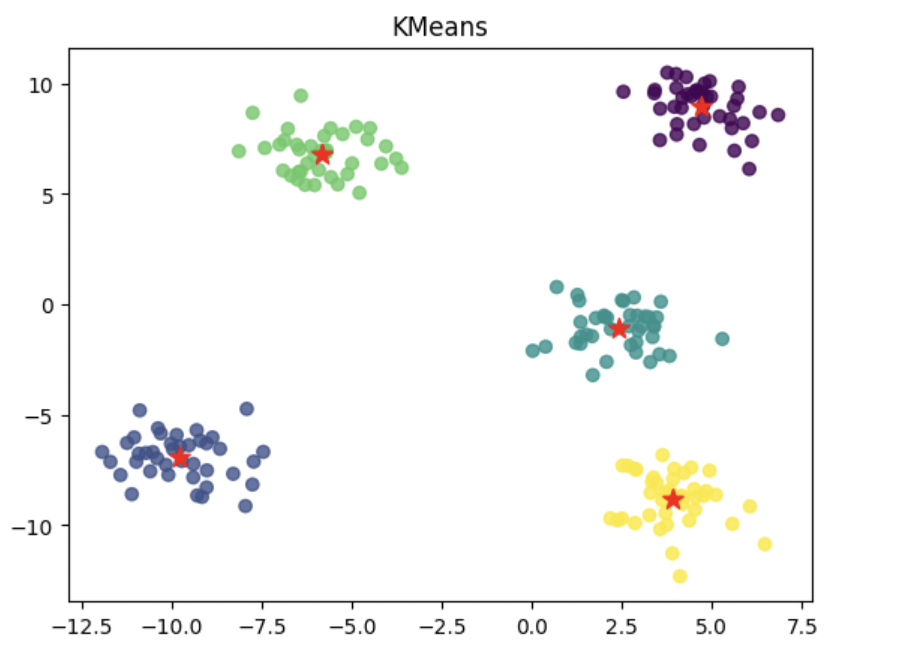


 

##K-Means Clustering: How does it work


---

Being an unsupervised machine learning model, K-means require only a few manual inputs to kick it off.
1. Select the number of clusters you want to identify (depending on whether you've got a predefined sample of cases)
2. The Kmeans algorithm will select a number of random data points (centroids)that match the number of clusters. That's the first stage of connections (**external clustering**) 
3. The algorithm calculates the distances between each point(centroids) to each cluster point
4. Within each cluster, the algorithm would start identify the closest  data points in its range (**internal clustering**)
5. Calculate the mean of each cluster and assign it as the new cluster centroid
6. Redefine clusters, thereby assigning a new mean as the next cluster centroid
7. Rinse and repeat the process as long as you identify clusters that minimize errors: **SSE [Distortion]**: distances of all points within a cluster from the centroid of other points - TL;DR ** the difference between the observed value and the predicted value**) 

###The Elbow Method: verify you pick the right number of clusters
To verify whether you've chosen the best cluster number you can plot the elbow method graph.

**how it works**

Define a range of K values to run k-means clustering on, and evaluate the SSE (Distortion) for the model using each of the defined numbers of clusters. 
Once the scree plot breaks down, you will learn how many clusters to pick up 


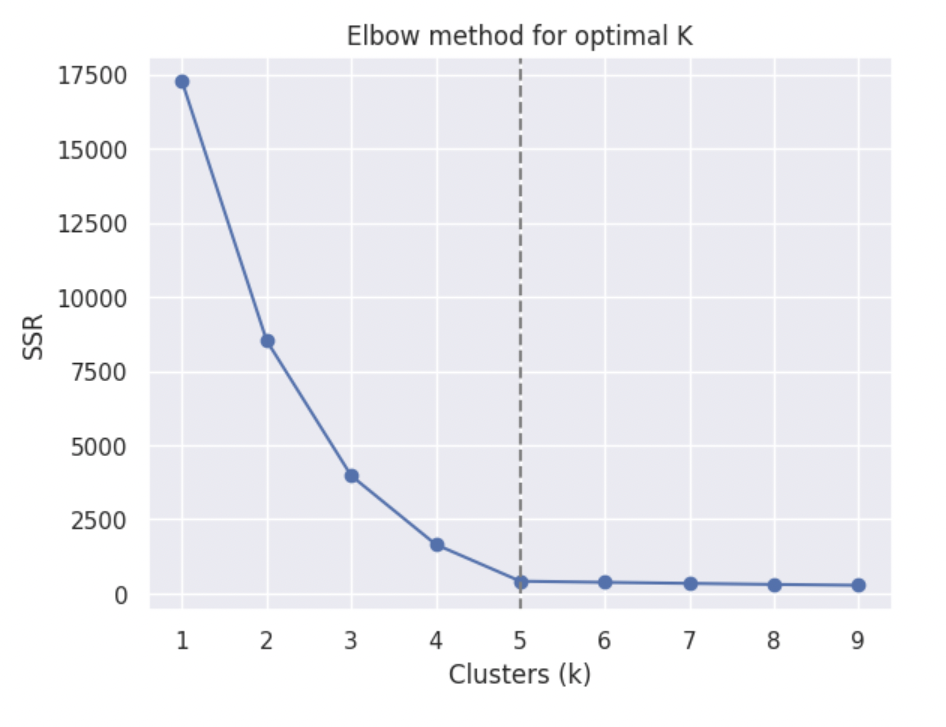

In [1]:
#@title Create a Dataset
from sklearn.datasets import make_blobs
 
# create a dataset of 200 samples
# and 5 clusters (**centers**)
features, labels = make_blobs(
    n_samples=200,
    centers=5
)

In [2]:
#@title Train the Model
from sklearn.cluster import KMeans
 
# Instanciate the model with 5 'K' clusters
# and 10 iterations with different
# centroid seed 
model = KMeans(
    n_clusters=5,
    n_init=10,
    random_state=42
    )
 
# train the model
model.fit(features)
 
# make a prediction on the data
p_labels = model.predict(features)

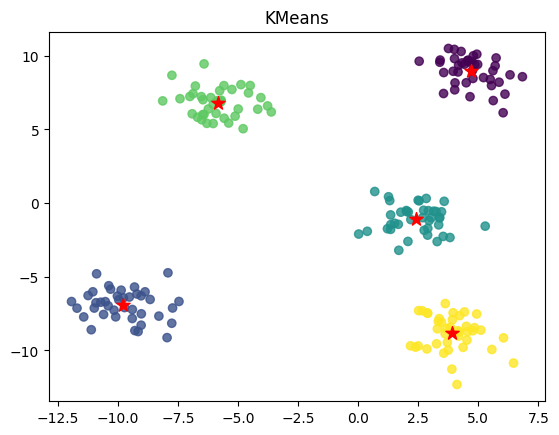

In [3]:
#@title Using Matplotlib to plot the K-means scatterplot and the cluster centroids
import matplotlib.pyplot as plt
plt.style.use('default')
 
X = features[:,0]
y = features[:,1]
 
plt.scatter(X, y, c=p_labels, alpha=0.8)
 
cluster_centers = model.cluster_centers_
cs_x = cluster_centers[:,0]
cs_y = cluster_centers[:,1]
 
plt.scatter(cs_x, cs_y, marker='*', s=100, c='r')
plt.title('KMeans')
plt.show()

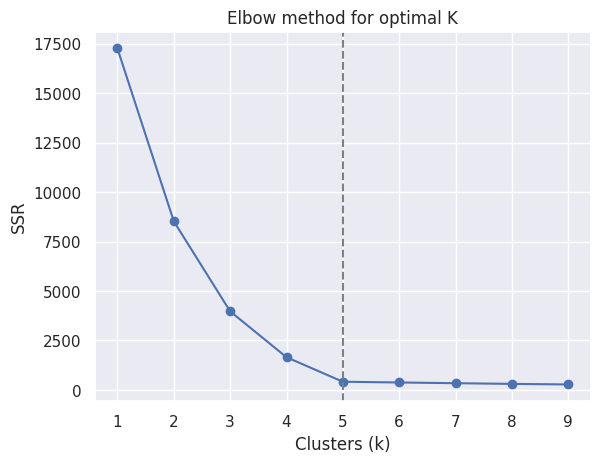

In [4]:
#@title Pick the best value for K with the Elbow method
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
 
ks = range(1, 10)
 
ssr = []
# For each cluster K
for k in ks:
    # create model instance of K clusters
    model = KMeans(n_clusters=k)
 
    # fit the model
    model.fit(features)
 
    # append the inertial to a list
    ssr.append(model.inertia_)
     
# Plot
plt.plot(ks, ssr, '-o')
plt.xlabel('Clusters (k)')
plt.ylabel('SSR')
plt.xticks(ks)
plt.title('Elbow method for optimal K')
plt.axvline(x=5,linestyle='--',c='grey')
plt.show()